# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods

##### Now that you have been equipped with the skills and the tools to use location data to explore a geographical location, over the course of two weeks, you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve.

# 1) Introduction/Business Problem

##### Clearly define a problem or an idea of your choice, where you would need to leverage the Foursquare location data to solve or execute. Remember that data science problems always target an audience and are meant to help a group of stakeholders solve a problem, so make sure that you explicitly describe your audience and why they would care about your problem.

*__The idea of this study is to help people planning to open a new restaurant in Toronto to chose the right location by providing data about the income and population of each neighborhood as well as the competitors already present on the same r regions.__*

*__While opening a resturant can be a very lucrative business, a lack of demand causes many resturants to close within the first year of opening. There are many different factors that can account for a resturant's success such as location, competition,and quality of the food.__*

*__The goal of this project is to use the Foursquare API to determine the optimal location to open an Indian Restaurant. For Indian Restaurant specifically, location and competition are both determined by where the restaurant will be opened. If there are too many Indian Restaurants in the local vicinity, the profitability of the restaurant will be severily decreased. Additionally, starting a restaurant in a location with higher income would increase the profitability of the business over starting in a poorer area.__*

*__Business Problem: If the client wanted to open an Indian Restaurant in Toronto, what areas are the best options to open the restaurant?__*

# 2) Data

##### Describe the data that you will be using to solve the problem or execute your idea. Remember that you will need to use the Foursquare location data to solve the problem or execute your idea. You can absolutely use other datasets in combination with the Foursquare location data. So make sure that you provide adequate explanation and discussion, with examples, of the data that you will be using, even if it is only Foursquare location data.

*__To provide the stakeholders the necessary information I'll be combining Toronto's 2016 Census that contains Population, Average income per Neighborhood with Foursquare API to collect competitors on the same neighborhoods.__*

*__Toronto's Census data in publicly available at this website: https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a__*

##### I will use Foursquare API to determine the average house price in different neighborhoods (used to estimate the average income of the inhabitants), population distribution of each area, the number of Indian Restaurant in each neighborhood and the number of total restaurant in each neighborhood. The data will then be used to cluster different postal codes to determine the optimal location to open the restaurant.

##### Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [12]:
import numpy as np 
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 


from geopy.geocoders import Nominatim 

import requests
from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans


import folium 

print('Libraries imported.')

Libraries imported.


In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/murak038/Optimal-Location-for-Opening-a-Restaurant/master/toronto.csv')
df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [14]:
df_pop = pd.read_csv('https://raw.githubusercontent.com/murak038/Optimal-Location-for-Opening-a-Restaurant/master/toronto_test.csv')
df_pop.head()

,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134.0,12494.0,2403.0,5.20,3700.0,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,1890.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411.0,54764.0,8570.0,19.04,19855.0,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,5570.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137.0,53485.0,4345.0,12.31,18445.0,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,3980.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127.0,29960.0,4011.0,7.47,10765.0,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,2625.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77


In [15]:
df_pop.dropna()

,PostalCode,Borough,Neighbourhood Number,"Population, 2016",Population density per square kilometre,Land area in square kilometres,Total - Household total income groups in 2015,"Under $5,000","$5,000 to $9,999","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $69,999","$70,000 to $79,999","$80,000 to $89,999","$90,000 to $99,999","$100,000 and over","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 and over",South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White
0,M1B,Scarborough,263.0,90290.0,6208.0,45.74,26825.0,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,9340.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64
1,M1C,Scarborough,134.0,12494.0,2403.0,5.20,3700.0,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,1890.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49
2,M1E,Scarborough,411.0,54764.0,8570.0,19.04,19855.0,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,5570.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03
3,M1G,Scarborough,137.0,53485.0,4345.0,12.31,18445.0,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,3980.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36
4,M1H,Scarborough,127.0,29960.0,4011.0,7.47,10765.0,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,2625.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77
5,M1J,Scarborough,139.0,16724.0,5395.0,3.10,5920.0,105.0,180.0,305.0,330.0,325.0,345.0,370.0,345.0,325.0,355.0,570.0,420.0,355.0,300.0,220.0,1080.0,410.0,240.0,230.0,195.0,33.01,2.33,19.91,5.68,1.67,0.84,0.42,3.41,0.12,0.12,26.13
6,M1K,Scarborough,125.0,13641.0,7031.0,1.94,5165.0,120.0,95.0,205.0,250.0,240.0,295.0,295.0,295.0,340.0,295.0,465.0,440.0,400.0,280.0,260.0,900.0,405.0,250.0,185.0,70.0,27.34,4.40,12.50,17.59,1.65,1.72,0.99,1.28,0.26,0.07,26.83
7,M1L,Scarborough,302.0,56512.0,26604.0,10.30,20800.0,480.0,580.0,1000.0,1160.0,1095.0,1135.0,1155.0,1110.0,1140.0,1055.0,1790.0,1545.0,1270.0,1095.0,975.0,4250.0,1735.0,1005.0,1045.0,465.0,31.84,5.75,12.58,6.93,1.27,0.74,0.98,2.23,0.55,0.40,31.57
8,M1M,Scarborough,385.0,55834.0,14094.0,13.83,20390.0,305.0,420.0,780.0,1120.0,1100.0,1105.0,1075.0,1065.0,1060.0,980.0,1755.0,1430.0,1330.0,1125.0,910.0,4825.0,1760.0,1150.0,1155.0,745.0,23.88,4.92,12.26,11.01,1.36,0.84,0.88,1.50,0.27,0.43,36.61
9,M1N,Scarborough,122.0,22291.0,3765.0,5.92,9200.0,165.0,290.0,320.0,335.0,405.0,330.0,315.0,340.0,330.0,310.0,650.0,595.0,525.0,475.0,465.0,3345.0,935.0,670.0,825.0,930.0,6.30,5.34,3.99,3.72,1.01,0.47,1.19,0.43,0.13,0.87,71.51


## Combine the two dataFrames

In [16]:
PostCode = []
Borough=[]
Neighborhood=[]
Population=[]
Longitude = []
Latitude = []
P_density = []
Area = []
P1 = []
P2 = []
P3 = []
P4 = []
P5 = []
P6 = []
P7 = []
P8 = []
P9 = []
P10 = []
P11 = []
P12 = []
P13 = []
P14 = []
P15 = []
P16 = []
P17 = []
P18 = []
P19 = []
P20 = []
South_Asian = []
Chinese = []
Black = []
Filipino = []
Latin_American = []
Arab = []
Southeast_Asian =[]
West_Asian = []
Korean = []
Japanese = []
White = []
SP = []

for i in df['PostalCode']:
    if df_pop['PostalCode'].isin([i]).any():
        PostCode.append(i)
        loc = df.index[df['PostalCode']==i]
        Borough.append(df['Borough'][loc].values[0])
        Neighborhood.append(df['Neighborhood'][loc].values[0])
        Latitude.append(df['Latitude'][loc].values[0])
        Longitude.append(df['Longitude'][loc].values[0])
        loc = df_pop.index[df_pop['PostalCode']==i]
        Population.append(df_pop['Population, 2016'][loc].values[0])
        P_density.append(df_pop['Population density per square kilometre'][loc].values[0])
        Area.append(df_pop['Land area in square kilometres'][loc].values[0])
        p1=(df_pop['  Under $5,000'][loc].values[0])
        p2=(df_pop['  $5,000 to $9,999'][loc].values[0])
        p3=(df_pop['  $10,000 to $14,999'][loc].values[0])
        p4=(df_pop['  $15,000 to $19,999'][loc].values[0])
        p5=(df_pop['  $20,000 to $24,999'][loc].values[0])
        p6=(df_pop['  $25,000 to $29,999'][loc].values[0])
        p7=(df_pop['  $30,000 to $34,999'][loc].values[0])
        p8=(df_pop['  $35,000 to $39,999'][loc].values[0])
        p9=(df_pop['  $40,000 to $44,999'][loc].values[0])
        p10=(df_pop['  $45,000 to $49,999'][loc].values[0])
        p11=(df_pop['  $50,000 to $59,999'][loc].values[0])
        p12=(df_pop['  $60,000 to $69,999'][loc].values[0])
        p13=(df_pop['  $70,000 to $79,999'][loc].values[0])
        p14=(df_pop['  $80,000 to $89,999'][loc].values[0])
        p15=(df_pop['  $90,000 to $99,999'][loc].values[0])
        p16=(df_pop['  $100,000 and over'][loc].values[0])
        p17=(df_pop['    $100,000 to $124,999'][loc].values[0])
        p18=(df_pop['    $125,000 to $149,999'][loc].values[0])
        p19=(df_pop['    $150,000 to $199,999'][loc].values[0])
        p20=(df_pop['    $200,000 and over'][loc].values[0])
        South_Asian.append(df_pop['    South Asian'][loc].values[0])
        Chinese.append(df_pop['    Chinese'][loc].values[0])
        Black.append(df_pop['    Black'][loc].values[0])
        Filipino.append(df_pop['    Filipino'][loc].values[0])
        Latin_American.append(df_pop['    Latin American'][loc].values[0])
        Arab.append(df_pop['    Arab'][loc].values[0])
        Southeast_Asian.append(df_pop['    Southeast Asian'][loc].values[0])
        West_Asian.append(df_pop['    West Asian'][loc].values[0])
        Korean.append(df_pop['    Korean'][loc].values[0])
        Japanese.append(df_pop['    Japanese'][loc].values[0])
        White.append(df_pop['White'][loc].values[0])
        sp = 5000*p1+7500*p2+12500*p3+17500*p4+22500*p5+27500*p6+32500*p7+37500*p8+42500*p9+\
        47500*p10+55000*p11+65000*p12+75000*p13+85000*p14+95000*p15+112500*p17+137500*p18+\
        175000*p19+200000*p20
        P1.append(p1)
        P2.append(p2)
        P3.append(p3)
        P4.append(p4)
        P5.append(p5)
        P6.append(p6)
        P7.append(p7)
        P8.append(p8)
        P9.append(p9)
        P10.append(p10)
        P11.append(p11)
        P12.append(p12)
        P13.append(p13)
        P14.append(p14)
        P15.append(p15)
        P16.append(p16)
        P17.append(p17)
        P18.append(p18)
        P19.append(p19)
        P20.append(p20)
        SP.append(sp)

In [17]:
len(SP)

87

## Create a new DataFrame by combining the two DataFrames

In [18]:
df_data = pd.DataFrame({'PostCode':PostCode,'Borough':Borough,'Neighborhood':Neighborhood,'Latitude':Latitude,
                        'Longitude':Longitude,'Population':Population,'Density':P_density,'Area':Area,
                       '< 5k':P1,'5k - 10k':P2,'10k - 15k':P3,'15k - 20k':P4,'20k - 25k':P5,'25k - 30k':P6,
                        '30k - 35k':P7,'35k - 40k':P8,'40k - 45k':P9,'45k - 50k':P10,'50k - 60k':P11,
                        '60k - 70k':P12,'70k - 80k':P13,'80k - 90k':P14,'90k - 100k':P15,'100k - 125k':P17,
                        '125k - 150k':P18,'150k - 200k':P19,'> 200k':P20, 'South Asian':South_Asian,
                       'Chinese':Chinese,'Black':Black,'Filipino':Filipino,'Latin American':Latin_American,
                       'Arab':Arab,'Southeast Asian':Southeast_Asian,'West Asian':West_Asian,'Korean':Korean,
                       'Japanese':Japanese,'White':White,'Spending Power':SP})

In [19]:
df_data.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,2.331712e+09
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494.0,2403.0,5.20,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49,3.970375e+08
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,54764.0,8570.0,19.04,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03,1.511462e+09
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485.0,4345.0,12.31,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36,1.240412e+09
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,29960.0,4011.0,7.47,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77,7.651875e+08


## Standardize the Spending Power

In [20]:
df_data["Spending Power"] = (df_data["Spending Power"]-df_data["Spending Power"].mean())/df_data["Spending Power"].std()

df_data.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.756524
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494.0,2403.0,5.20,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49,-0.802399
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,54764.0,8570.0,19.04,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03,0.671610
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485.0,4345.0,12.31,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36,0.313102
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,29960.0,4011.0,7.47,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77,-0.315461


## Find the coordinates of Toronto

In [21]:
address = 'Toronto'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


## Create a map to visualize the location of the different postal codes

In [22]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,).add_to(map_toronto)  
    
map_toronto

## Foursquare API Credentials

In [68]:
CLIENT_ID = 'V0DGIPOL3TARSV1GJA3IFZZMB4XK4BLS1WLMHEKVY0ZXOG5L' 
CLIENT_SECRET = 'OPHJQIJSA33Y3HU1TIM4LNMT5HJOAXAO2AU2VIITTPQGFU3S' # your Foursquare Secret
VERSION = '20200424' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: V0DGIPOL3TARSV1GJA3IFZZMB4XK4BLS1WLMHEKVY0ZXOG5L
CLIENT_SECRET:OPHJQIJSA33Y3HU1TIM4LNMT5HJOAXAO2AU2VIITTPQGFU3S


## Function to look up top 200 places within 2,000 meters of coordinates

In [77]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [80]:
LIMIT = 200
venues = getNearbyVenues(names=df_data['Neighborhood'],
                                   latitudes=df_data['Latitude'],
                                   longitudes=df_data['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West, Steeles West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview Central
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, Riverdale
The Beaches West, India Baz

In [81]:
print(venues.shape)
venues.head()

(864, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,African Rainforest Pavilion,43.817725,-79.183433,Zoo Exhibit
1,"Rouge, Malvern",43.806686,-79.194353,Toronto Pan Am Sports Centre,43.790623,-79.193869,Athletics & Sports
2,"Rouge, Malvern",43.806686,-79.194353,Polar Bear Exhibit,43.823372,-79.185145,Zoo
3,"Rouge, Malvern",43.806686,-79.194353,Orangutan Exhibit,43.818413,-79.182548,Zoo Exhibit
4,"Rouge, Malvern",43.806686,-79.194353,Penguin Exhibit,43.819435,-79.185959,Zoo Exhibit


In [83]:
venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",10,10,10,10,10,10
Agincourt,10,10,10,10,10,10
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",10,10,10,10,10,10
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",10,10,10,10,10,10
"Alderwood, Long Branch",10,10,10,10,10,10
"Bathurst Manor, Downsview North, Wilson Heights",10,10,10,10,10,10
Bayview Village,10,10,10,10,10,10
"Bedford Park, Lawrence Manor East",10,10,10,10,10,10
"Birch Cliff, Cliffside West",10,10,10,10,10,10


In [84]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 165 uniques categories.


## One hot encode the unique categories

In [85]:
# one hot encoding
venues_onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
venues_onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

venues_onehot.head()

,Zoo Exhibit,Afghan Restaurant,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Coffee Shop,College Rec Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Liquor Store,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Museum,Music Store,Neighborhood,New American Restaurant,Noodle House,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool Hall,Pub,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shopping Mall,Skating Rink,Ski Chalet,Smoke Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Xinjiang Restaurant,Yoga Studio,Zoo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [86]:
venues_onehot.shape

(864, 165)

In [87]:
venues_grouped = venues_onehot.groupby('Neighborhood').sum().reset_index()
venues_grouped

,Neighborhood,Zoo Exhibit,Afghan Restaurant,Airport,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Beach,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Butcher,Café,Cantonese Restaurant,Caribbean Restaurant,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Coffee Shop,College Rec Center,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,General Entertainment,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Liquor Store,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Movie Theater,Museum,Music Store,New American Restaurant,Noodle House,Organic Grocery,Other Great Outdoors,Outdoor Supply Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool Hall,Pub,Racetrack,Ramen Restaurant,Record Shop,Restaurant,Rock Climbing Spot,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shopping Mall,Skating Rink,Ski Chalet,Smoke Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Track,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Xinjiang Restaurant,Yoga Studio,Zoo
0,"Adelaide, King, Richmond",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Agincourt,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Alderwood, Long Branch",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [88]:
num_top_venues = 10

for hood in venues_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = venues_grouped[venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                      venue  freq
0                      Café   2.0
1  Mediterranean Restaurant   1.0
2                     Plaza   1.0
3       American Restaurant   1.0
4                 Speakeasy   1.0
5      Gym / Fitness Center   1.0
6                Smoke Shop   1.0
7           Thai Restaurant   1.0
8              Noodle House   0.0
9             Movie Theater   0.0


----Agincourt----
                   venue  freq
0   Caribbean Restaurant   2.0
1           Noodle House   1.0
2            Supermarket   1.0
3         Breakfast Spot   1.0
4       Asian Restaurant   1.0
5   Gym / Fitness Center   1.0
6   Cantonese Restaurant   1.0
7      Indian Restaurant   1.0
8  Sri Lankan Restaurant   1.0
9            Zoo Exhibit   0.0


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
                           venue  freq
0                   Noodle House   2.0
1                Bubble Tea Shop   1.0
2           Caribbean Restaurant   1.0
3        

In [89]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [90]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = venues_grouped['Neighborhood']

for ind in np.arange(venues_sorted.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Café,Speakeasy,Gym / Fitness Center,American Restaurant,Plaza,Smoke Shop,Mediterranean Restaurant,Thai Restaurant,Eastern European Restaurant,Farmers Market
1,Agincourt,Caribbean Restaurant,Gym / Fitness Center,Indian Restaurant,Noodle House,Cantonese Restaurant,Breakfast Spot,Supermarket,Sri Lankan Restaurant,Asian Restaurant,General Entertainment
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Noodle House,Bakery,Indian Restaurant,Gym,Bubble Tea Shop,Vegetarian / Vegan Restaurant,Chinese Restaurant,Caribbean Restaurant,Tattoo Parlor,Fast Food Restaurant
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Pharmacy,Sandwich Place,Grocery Store,Steakhouse,Coffee Shop,Burger Joint,Skating Rink,Chinese Restaurant,Fast Food Restaurant,Fried Chicken Joint
4,"Alderwood, Long Branch",Pizza Place,Gym,Grocery Store,Greek Restaurant,Gourmet Shop,Burger Joint,Pub,Café,Seafood Restaurant,Discount Store


In [91]:
venues_grouped.columns.values.tolist()

['Neighborhood',
 'Zoo Exhibit',
 'Afghan Restaurant',
 'Airport',
 'American Restaurant',
 'Art Gallery',
 'Arts & Crafts Store',
 'Asian Restaurant',
 'Athletics & Sports',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bank',
 'Bar',
 'Beach',
 'Beer Bar',
 'Beer Store',
 'Bike Shop',
 'Bistro',
 'Bookstore',
 'Boutique',
 'Brazilian Restaurant',
 'Breakfast Spot',
 'Brewery',
 'Bridal Shop',
 'Bubble Tea Shop',
 'Burger Joint',
 'Burrito Place',
 'Butcher',
 'Café',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Castle',
 'Cheese Shop',
 'Chinese Restaurant',
 'Chocolate Shop',
 'Climbing Gym',
 'Clothing Store',
 'Coffee Shop',
 'College Rec Center',
 'Concert Hall',
 'Convenience Store',
 'Cosmetics Shop',
 'Creperie',
 'Cuban Restaurant',
 'Deli / Bodega',
 'Department Store',
 'Dessert Shop',
 'Diner',
 'Discount Store',
 'Dog Run',
 'Doner Restaurant',
 'Eastern European Restaurant',
 'Ethiopian Restaurant',
 'Event Space',
 'Falafel Restaurant',
 'Farmers Market',
 'Fast Food

## Calculate the total number of restaurants in each region

In [125]:
total_restaurants = venues_grouped['American Restaurant']+\
venues_grouped['Asian Restaurant']+venues_grouped['BBQ Joint']+\
venues_grouped['Bagel Shop']+venues_grouped['Brazilian Restaurant']+\
venues_grouped['Breakfast Spot']+venues_grouped['Burger Joint']+venues_grouped['Burrito Place']+\
venues_grouped['Cantonese Restaurant']+venues_grouped['Caribbean Restaurant']+\
venues_grouped['Chinese Restaurant']+\
venues_grouped['Cuban Restaurant']+venues_grouped['Deli / Bodega']+\
venues_grouped['Diner']+venues_grouped['Doner Restaurant']+\
venues_grouped['Eastern European Restaurant']+venues_grouped['Ethiopian Restaurant']+\
venues_grouped['Falafel Restaurant']+venues_grouped['Fast Food Restaurant']+venues_grouped['Filipino Restaurant']+\
venues_grouped['Fish & Chips Shop']+venues_grouped['French Restaurant']+venues_grouped['Fried Chicken Joint']+\
venues_grouped['Greek Restaurant']+venues_grouped['Hakka Restaurant']+\
venues_grouped['Hotpot Restaurant']+\
venues_grouped['Indian Restaurant']+venues_grouped['Indonesian Restaurant']+venues_grouped['Italian Restaurant']+\
venues_grouped['Japanese Restaurant']+venues_grouped['Korean Restaurant']+\
venues_grouped['Latin American Restaurant']+venues_grouped['Mediterranean Restaurant']+\
venues_grouped['Mexican Restaurant']+venues_grouped['Middle Eastern Restaurant']+\
venues_grouped['New American Restaurant']+\
venues_grouped['Pizza Place']+\
venues_grouped['Ramen Restaurant']+venues_grouped['Restaurant']+\
venues_grouped['Sandwich Place']+\
venues_grouped['Seafood Restaurant']+\
venues_grouped['Sri Lankan Restaurant']+\
venues_grouped['Steakhouse']+venues_grouped['Sushi Restaurant']+venues_grouped['Szechuan Restaurant']+\
venues_grouped['Tapas Restaurant']+venues_grouped['Thai Restaurant']+\
venues_grouped['Turkish Restaurant']+venues_grouped['Vegetarian / Vegan Restaurant']+\
venues_grouped['Vietnamese Restaurant']+venues_grouped['Wings Joint']

In [126]:
df_restaurants = pd.DataFrame(data={'Neighborhood': venues_grouped['Neighborhood'],'Total Restaurants':total_restaurants,
                                  'Indian Restaurants':venues_grouped['Indian Restaurant']})

In [127]:
df_restaurants.head(10)

,Neighborhood,Total Restaurants,Indian Restaurants
0,"Adelaide, King, Richmond",3,0
1,Agincourt,7,1
2,"Agincourt North, L'Amoreaux East, Milliken, St...",4,1
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",6,0
4,"Alderwood, Long Branch",4,0
5,"Bathurst Manor, Downsview North, Wilson Heights",4,0
6,Bayview Village,8,0
7,"Bedford Park, Lawrence Manor East",6,1
8,"Birch Cliff, Cliffside West",3,0
9,"Bloordale Gardens, Eringate, Markland Wood, Ol...",0,0


In [128]:
df_data.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.756524
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494.0,2403.0,5.20,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49,-0.802399
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,54764.0,8570.0,19.04,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03,0.671610
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485.0,4345.0,12.31,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36,0.313102
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,29960.0,4011.0,7.47,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77,-0.315461


In [129]:
venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Café,Speakeasy,Gym / Fitness Center,American Restaurant,Plaza,Smoke Shop,Mediterranean Restaurant,Thai Restaurant,Eastern European Restaurant,Farmers Market
1,Agincourt,Caribbean Restaurant,Gym / Fitness Center,Indian Restaurant,Noodle House,Cantonese Restaurant,Breakfast Spot,Supermarket,Sri Lankan Restaurant,Asian Restaurant,General Entertainment
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Noodle House,Bakery,Indian Restaurant,Gym,Bubble Tea Shop,Vegetarian / Vegan Restaurant,Chinese Restaurant,Caribbean Restaurant,Tattoo Parlor,Fast Food Restaurant
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Pharmacy,Sandwich Place,Grocery Store,Steakhouse,Coffee Shop,Burger Joint,Skating Rink,Chinese Restaurant,Fast Food Restaurant,Fried Chicken Joint
4,"Alderwood, Long Branch",Pizza Place,Gym,Grocery Store,Greek Restaurant,Gourmet Shop,Burger Joint,Pub,Café,Seafood Restaurant,Discount Store


## Combine the two dataFrames to get the final data

In [130]:
df_final = pd.merge(df_data,df_restaurants,on='Neighborhood')
df_final.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Population,Density,Area,< 5k,5k - 10k,10k - 15k,15k - 20k,20k - 25k,25k - 30k,30k - 35k,35k - 40k,40k - 45k,45k - 50k,50k - 60k,60k - 70k,70k - 80k,80k - 90k,90k - 100k,100k - 125k,125k - 150k,150k - 200k,> 200k,South Asian,Chinese,Black,Filipino,Latin American,Arab,Southeast Asian,West Asian,Korean,Japanese,White,Spending Power,Total Restaurants,Indian Restaurants
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,90290.0,6208.0,45.74,290.0,240.0,420.0,720.0,730.0,925.0,955.0,1090.0,1055.0,1110.0,2330.0,2150.0,1930.0,1845.0,1640.0,3355.0,2315.0,2390.0,1300.0,41.64,6.00,16.49,9.92,1.41,0.84,0.55,1.32,0.16,0.15,14.64,1.756524,1,0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,12494.0,2403.0,5.20,60.0,25.0,45.0,60.0,70.0,80.0,90.0,120.0,80.0,115.0,230.0,230.0,200.0,195.0,210.0,490.0,410.0,550.0,440.0,36.14,7.64,12.41,6.44,1.64,0.68,0.68,0.80,1.04,0.28,25.49,-0.802399,4,0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,54764.0,8570.0,19.04,315.0,540.0,815.0,970.0,880.0,890.0,905.0,885.0,905.0,815.0,1565.0,1360.0,1255.0,1140.0,1050.0,1970.0,1320.0,1390.0,915.0,18.74,3.44,15.05,8.04,1.74,0.50,0.90,1.29,0.37,0.53,43.03,0.671610,4,0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,53485.0,4345.0,12.31,435.0,455.0,685.0,1170.0,825.0,960.0,910.0,950.0,955.0,815.0,1725.0,1405.0,1240.0,1070.0,865.0,1660.0,1030.0,855.0,430.0,40.28,6.95,10.91,7.65,1.39,1.14,0.59,2.47,0.39,0.19,23.36,0.313102,3,1
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,29960.0,4011.0,7.47,615.0,220.0,255.0,450.0,370.0,475.0,465.0,520.0,495.0,530.0,935.0,845.0,765.0,615.0,575.0,1015.0,700.0,635.0,275.0,27.72,14.69,6.38,9.63,1.77,1.12,1.03,2.72,0.68,0.52,26.77,-0.315461,6,1


In [131]:
df_final.columns.values.tolist()

['PostCode',
 'Borough',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'Population',
 'Density',
 'Area',
 '< 5k',
 '5k - 10k',
 '10k - 15k',
 '15k - 20k',
 '20k - 25k',
 '25k - 30k',
 '30k - 35k',
 '35k - 40k',
 '40k - 45k',
 '45k - 50k',
 '50k - 60k',
 '60k - 70k',
 '70k - 80k',
 '80k - 90k',
 '90k - 100k',
 '100k - 125k',
 '125k - 150k',
 '150k - 200k',
 '> 200k',
 'South Asian',
 'Chinese',
 'Black',
 'Filipino',
 'Latin American',
 'Arab',
 'Southeast Asian',
 'West Asian',
 'Korean',
 'Japanese',
 'White',
 'Spending Power',
 'Total Restaurants',
 'Indian Restaurants']

## Drop columns that wont be used for clustering

In [132]:
df_final1=df_final.drop(['PostCode','Borough','Latitude','Longitude','Density','South Asian','Chinese',
                         'Black','Filipino','Latin American','Arab','Southeast Asian','West Asian','Korean',
                         'Japanese','White','< 5k','5k - 10k','10k - 15k','15k - 20k','20k - 25k','25k - 30k',
                         '30k - 35k','35k - 40k','40k - 45k','45k - 50k','50k - 60k','60k - 70k','70k - 80k',
                         '80k - 90k','90k - 100k','100k - 125k','125k - 150k','150k - 200k','> 200k'],axis=1)

In [133]:
df_final1.head()

,Neighborhood,Population,Area,Spending Power,Total Restaurants,Indian Restaurants
0,"Rouge, Malvern",90290.0,45.74,1.756524,1,0
1,"Highland Creek, Rouge Hill, Port Union",12494.0,5.20,-0.802399,4,0
2,"Guildwood, Morningside, West Hill",54764.0,19.04,0.671610,4,0
3,Woburn,53485.0,12.31,0.313102,3,1
4,Cedarbrae,29960.0,7.47,-0.315461,6,1


## Run K-Means Clustering with K = 5

In [134]:
# set number of clusters
kclusters = 5

grouped_clustering = df_final1.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 0, 0, 2, 4, 1, 0, 0, 4], dtype=int32)

In [135]:
df_final1.insert(0, 'Cluster Labels', kmeans.labels_)

In [136]:
venues_merged = df_final.loc[:,'PostCode':'Longitude']
venues_merged.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [137]:
venues_merged = venues_merged.join(df_final1.set_index('Neighborhood'), on='Neighborhood')

venues_merged.head()

,PostCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Indian Restaurants
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,90290.0,45.74,1.756524,1,0
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,1,12494.0,5.20,-0.802399,4,0
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,54764.0,19.04,0.671610,4,0
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0,53485.0,12.31,0.313102,3,1
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,2,29960.0,7.47,-0.315461,6,1


In [138]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires,sp in zip(venues_merged['Latitude'], venues_merged['Longitude'], venues_merged['Neighborhood'], venues_merged['Cluster Labels'],venues_merged['Total Restaurants'],venues_merged['Indian Restaurants'],venues_merged['Spending Power']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) + '\nIndian Restaurants: '+str(ires) +'\nSpending: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Cluster 1

In [139]:
venues_merged.loc[venues_merged['Cluster Labels'] == 0, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Indian Restaurants
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,54764.0,19.04,0.671610,4,0
3,Scarborough,Woburn,43.770992,-79.216917,0,53485.0,12.31,0.313102,3,1
7,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577,0,56512.0,10.30,0.474186,6,1
8,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476,0,55834.0,13.83,0.569401,1,0
10,Scarborough,"Dorset Park, Scarborough Town Centre, Wexford ...",43.757410,-79.273304,0,51575.0,15.42,0.245414,4,1
18,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,0,42774.0,6.80,0.243348,3,0
27,North York,"Bathurst Manor, Downsview North, Wilson Heights",43.754328,-79.442259,0,67397.0,23.84,1.300205,4,0
38,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,61173.0,13.31,1.843853,4,0
41,Central Toronto,Davisville North,43.712751,-79.390197,0,46433.0,4.45,1.450377,1,0
59,Downtown Toronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,0,48217.0,6.28,1.784416,0,0


## Cluster 2

In [140]:
venues_merged.loc[venues_merged['Cluster Labels'] == 1, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Indian Restaurants
1,Scarborough,1,12494.0,5.20,-0.802399,4,0
6,Scarborough,1,13641.0,1.94,-0.891249,3,0
30,North York,1,11058.0,1.71,-0.941213,6,0
33,East York,1,7865.0,1.17,-0.934319,4,0
37,East York,1,11499.0,1.70,-0.809310,5,0
42,Central Toronto,1,11817.0,1.65,-0.588095,4,1
44,Central Toronto,1,12528.0,1.17,-0.416909,4,0
48,Downtown Toronto,1,15818.0,3.00,-0.727471,4,0
50,Downtown Toronto,1,7727.0,0.95,-0.982116,3,0
52,Downtown Toronto,1,13826.0,1.44,-0.607571,1,0


## Cluster 3

In [141]:
venues_merged.loc[venues_merged['Cluster Labels'] == 2, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Indian Restaurants
4,Scarborough,2,29960.0,7.47,-0.315461,6,1
11,Scarborough,2,27917.0,10.25,-0.324488,6,1
13,Scarborough,2,27446.0,5.41,-0.372501,8,0
16,Scarborough,2,30491.0,5.20,-0.487903,0,0
20,North York,2,27078.0,16.24,0.261964,3,0
23,North York,2,26274.0,3.58,-0.438783,8,0
24,North York,2,34805.0,7.42,0.061812,4,0
25,North York,2,27695.0,9.98,0.169411,5,0
28,North York,2,27593.0,13.23,-0.451927,6,0
32,East York,2,31216.0,6.54,0.085703,2,1


## Cluster 4

In [142]:
venues_merged.loc[venues_merged['Cluster Labels'] == 3, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Indian Restaurants
0,Scarborough,3,90290.0,45.74,1.756524,1,0
14,Scarborough,3,86468.0,19.96,1.712083,4,1
21,North York,3,90362.0,13.80,2.350813,4,0
46,Downtown Toronto,3,76716.0,8.01,3.838132,2,0
70,West Toronto,3,82712.0,10.51,2.841538,3,0
79,Etobicoke,3,105450.0,26.38,3.748670,3,0


## Cluster 5

In [143]:
venues_merged.loc[venues_merged['Cluster Labels'] == 4, venues_merged.columns[[1] + list(range(5, venues_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Indian Restaurants
5,Scarborough,4,16724.0,3.10,-0.832936,2,1
9,Scarborough,4,22291.0,5.92,-0.257743,3,0
12,Scarborough,4,23757.0,7.83,-0.540925,7,1
15,Scarborough,4,24623.0,4.53,-0.524177,9,0
17,North York,4,16934.0,5.38,-0.627957,4,0
19,North York,4,21396.0,5.10,-0.304615,8,0
22,North York,4,16936.0,2.91,-0.558203,5,0
26,North York,4,21933.0,2.43,-0.719039,3,0
29,North York,4,16164.0,5.32,-0.497079,2,0
31,North York,4,17510.0,4.72,-0.693676,5,1


## Examine Cluster 4 further

In [144]:
cluster = venues_merged.loc[venues_merged['Cluster Labels'] == 3, venues_merged.columns[[1] + list(range(2, venues_merged.shape[1]))]]
cluster.head(10)

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,Population,Area,Spending Power,Total Restaurants,Indian Restaurants
0,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,90290.0,45.74,1.756524,1,0
14,Scarborough,"Agincourt North, L'Amoreaux East, Milliken, St...",43.815252,-79.284577,3,86468.0,19.96,1.712083,4,1
21,North York,"Newtonbrook, Willowdale",43.789053,-79.408493,3,90362.0,13.80,2.350813,4,0
46,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,3,76716.0,8.01,3.838132,2,0
70,West Toronto,"High Park, The Junction South",43.661608,-79.464763,3,82712.0,10.51,2.841538,3,0
79,Etobicoke,"Cloverdale, Islington, Martin Grove, Princess ...",43.650943,-79.554724,3,105450.0,26.38,3.748670,3,0


Text(0, 0.5, 'Count')

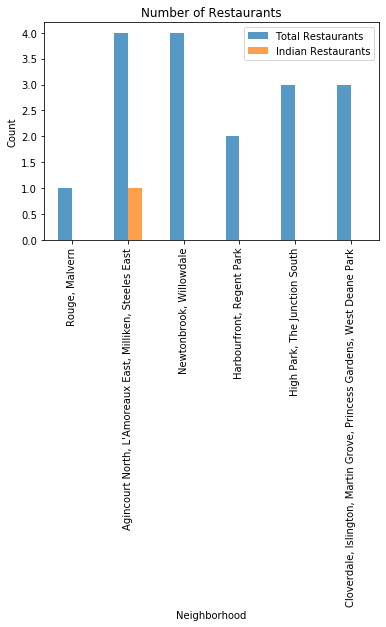

In [145]:
%matplotlib inline

ax = cluster.plot(x='Neighborhood',y=['Total Restaurants','Indian Restaurants'],kind='bar',alpha=0.75,title='Number of Restaurants')
ax.set_ylabel('Count')

Text(0, 0.5, 'Normalized Spending Power ($)')

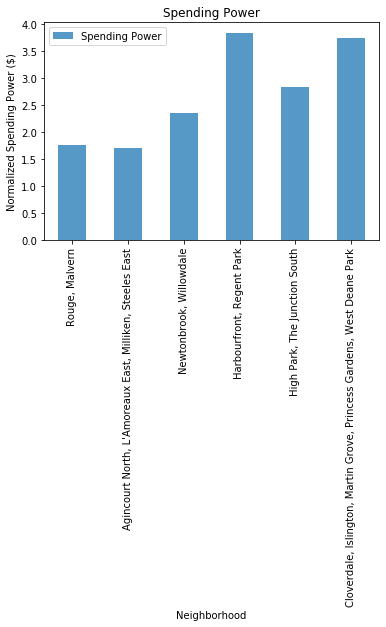

In [146]:
ax = cluster.plot(x='Neighborhood',y=['Spending Power'],kind='bar',alpha=0.75,title='Spending Power')
ax.set_ylabel('Normalized Spending Power ($)')

Text(0, 0.5, 'Population')

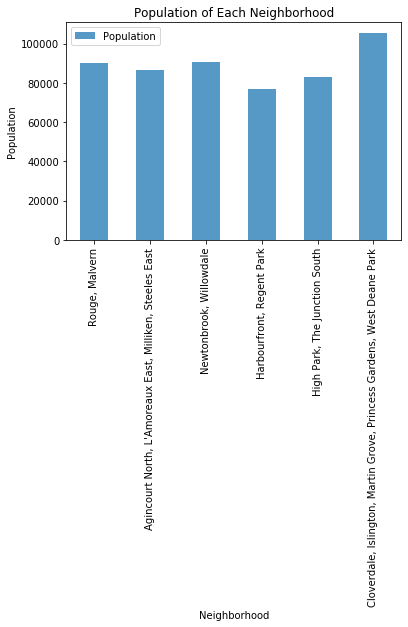

In [147]:
ax = cluster.plot(x='Neighborhood',y=['Population'],kind='bar',alpha=0.75,title='Population of Each Neighborhood')
ax.set_ylabel('Population')

In [149]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,res,ires,sp in zip(cluster['Latitude'], cluster['Longitude'], cluster['Neighborhood'], cluster['Cluster Labels'],cluster['Total Restaurants'],cluster['Indian Restaurants'],cluster['Spending Power']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + '\nRestaurants: '+str(res) + '\nIndian Restaurants: '+str(ires) +'\nSpending: '+str(sp), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters